# Rapport des résultats concernant le livrable 3

Table des matières : 
 - [Analyse du topic model](#topic-model)
    - [La visualisation pyldavis](#pyldavis)
    - [La matrice des distances de Jaccard inter-topic](#matrice-topic)
    - [Cellule d'analyse d'un topic](#analyse-topic)
        - Son importance dans le corpus
        - Son score de coherence
        - Les mots les plus représentatifs
        - Les 3 documents les plus représentatifs 
- [Analyse des clusters (#cluster-model)]:
    - [La visualisation en deux dimensions](#cluster-vis)
    - [Les metriques liées à la clusterisation](#cluster-score) : 
        - silhouette_score
        - calinski_harabasz_score
        - davies_bouldin_score
    - [La matrice des distances cosinus inter-cluster](#cluster-matrice)
    - [Cellule d'analyse d'un clsuter](#analyse-cluster) :
        - Son importance dans le corpus (%)
        - Un nuage de mots pour chaque cluster
        - Une liste des DCO associés
        - La liste des topics associés
        - 5 documents les plus représentatifs
    - [L'analyse des clusters les plus proches et les plus éloignés](#specific-cluster-analyse)
- [Analyse par document](#doc-analysis)
    - Distribution de thèmes associés
    - clsuter associés


In [1]:
import pandas as pd
import gensim
import pyLDAvis
import pyLDAvis.gensim
import os
import sklearn as sk 
import json
import numpy as np


import sys
sys.path.insert(0,"/home/robin/Nextcloud/strar_clay/GitLab/signalement-ia/regroupement/analyse/")
import analysis, cluster_model_analysis, topic_model_analysis

SAVE_PATH =  "/home/robin/Nextcloud/strar_clay/GitLab/Annexe/L3/"

path_to_regroupement = "/home/robin/Nextcloud/strar_clay/GitLab/signalement-ia/regroupement"
sys.path.insert(1,os.path.join(path_to_regroupement, 'training/' ))
import train_topic, train_cluster




In [2]:
%%time 
name = 'try_2'
# Loading
topicmodel = train_topic.TopicModel()
topicmodel.load(os.path.join(SAVE_PATH,name),name)

clustermodel = train_cluster.ClusterModel()
clustermodel.topicmodel = topicmodel
clustermodel.load(os.path.join(SAVE_PATH,name),name)

topicAnalysis = topic_model_analysis.topicModelAnalysis()
topicAnalysis.topic_model=topicmodel

clusterAnalysis = cluster_model_analysis.clusterModelAnalysis()
clusterAnalysis.cluster_model = clustermodel


CPU times: user 956 ms, sys: 241 ms, total: 1.2 s
Wall time: 1.32 s


## 1. Analyse du topic model <a class="anchor" id="topic-model"></a>

### 1.1 Visualisation globale via la bibliothèque pyLDAvis <a class="anchor" id="pyldavis"></a>

In [3]:
pyLDAvis.enable_notebook()
topicAnalysis.plot_lda_viz()

### 1.3 Analyse d'un Topic

Analyse du Topic 4
------------------------
Document le plus représentatif: 
------------------------













peau. L'infirmier liberal à ouvert 3 cathéters avec le meme problème - perte de temps et risque de mauvaise adhésion.
------------------------
Nuage de mot des termes associés


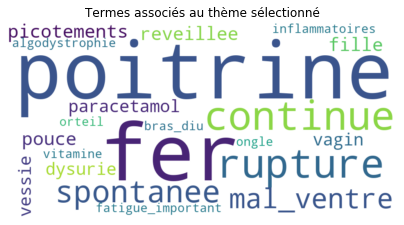

CPU times: user 1.08 s, sys: 54.9 ms, total: 1.13 s
Wall time: 1.29 s


In [4]:
%%time
analysis.plotTopicAnalysis(4, topicmodel)



### 1.3 Présentation des métriques d'évaluation 
<a class="anchor" id="matrice-topic)"> </a>

La carte des distances de Jaccard inter-topic se presente ainsi : 


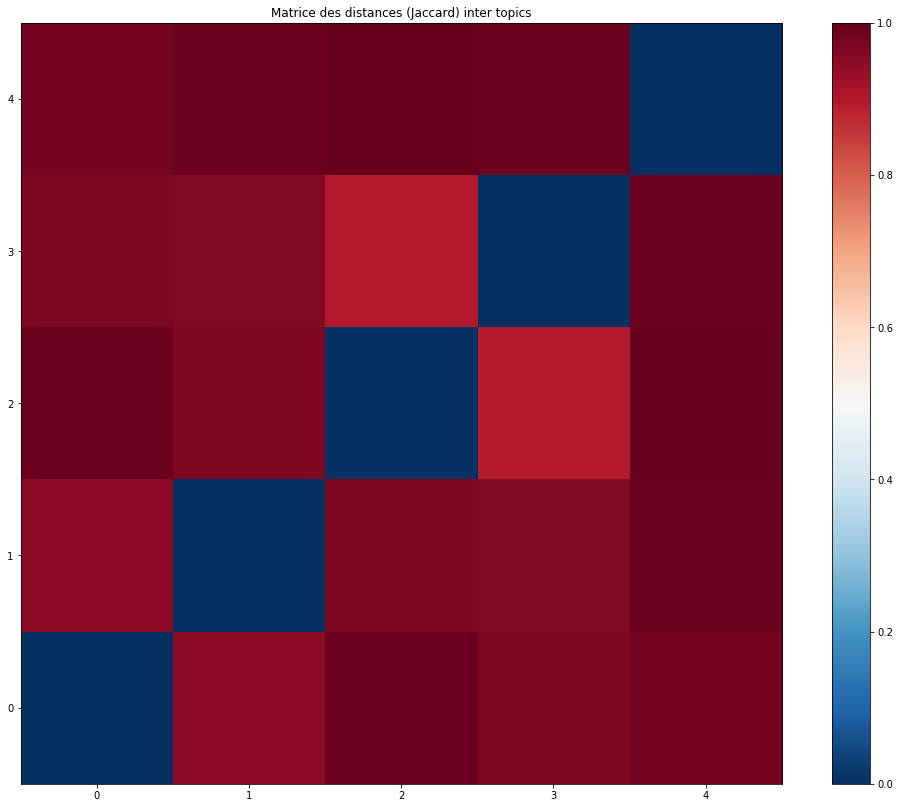

In [2]:

print('La carte des distances de Jaccard inter-topic se presente ainsi : ')
topicAnalysis.plot_topic_mat()

## 2. Analyse du modèle des clusters

### 2.1 Présentation des métriques d'évaluation

In [10]:
%%time 
clusterAnalysis.print_score(X = topicmodel.doc_topic_mat.iloc[:,:topicmodel.model.num_topics-1].values)



Le score silhouette est de:  0.4342184
Le score calinski harabasz est de: 146008.35393809332
Le score de davies bouldin  est de 0.9634541105079367
CPU times: user 57.8 s, sys: 20.8 s, total: 1min 18s
Wall time: 57.5 s


### 2.2 Analyse de la matrice des distances cosinus inter-cluster

CPU times: user 41.7 ms, sys: 3.52 ms, total: 45.2 ms
Wall time: 49.3 ms


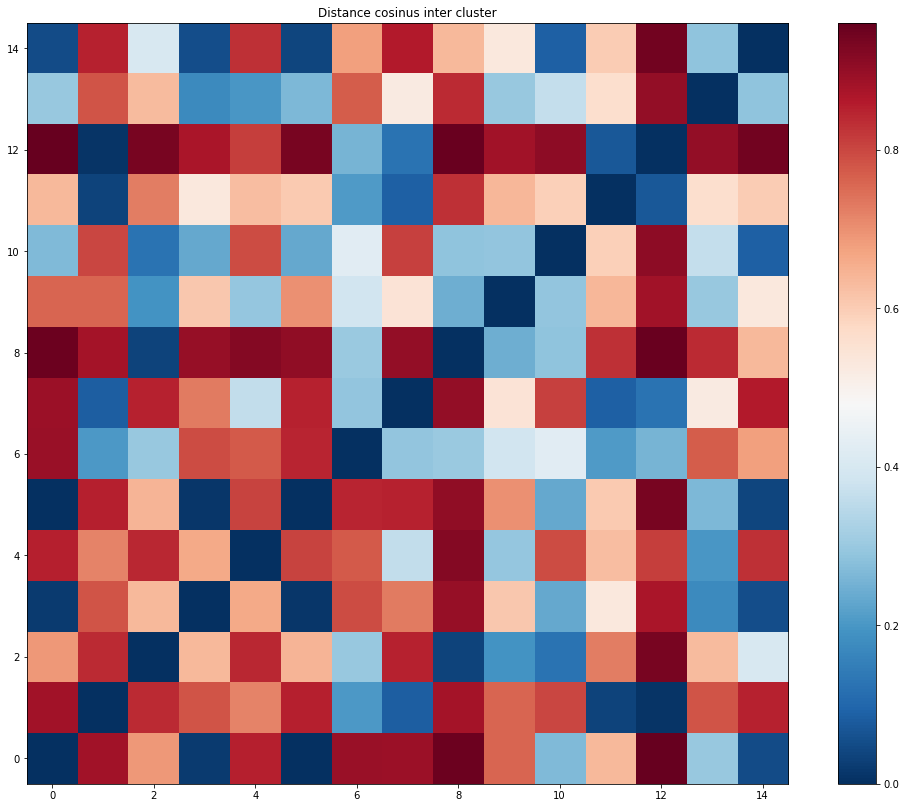

In [3]:
%%time 
clusterAnalysis.plot_dist_mat()

### 2.4 visualisation des centres des cluster via une pca en 2 dimention

In [8]:
%%time 
clusterAnalysis.plot_cluster(topicmodel)

CPU times: user 216 ms, sys: 44.2 ms, total: 260 ms
Wall time: 432 ms


### 2.4 Analyse d'un cluster

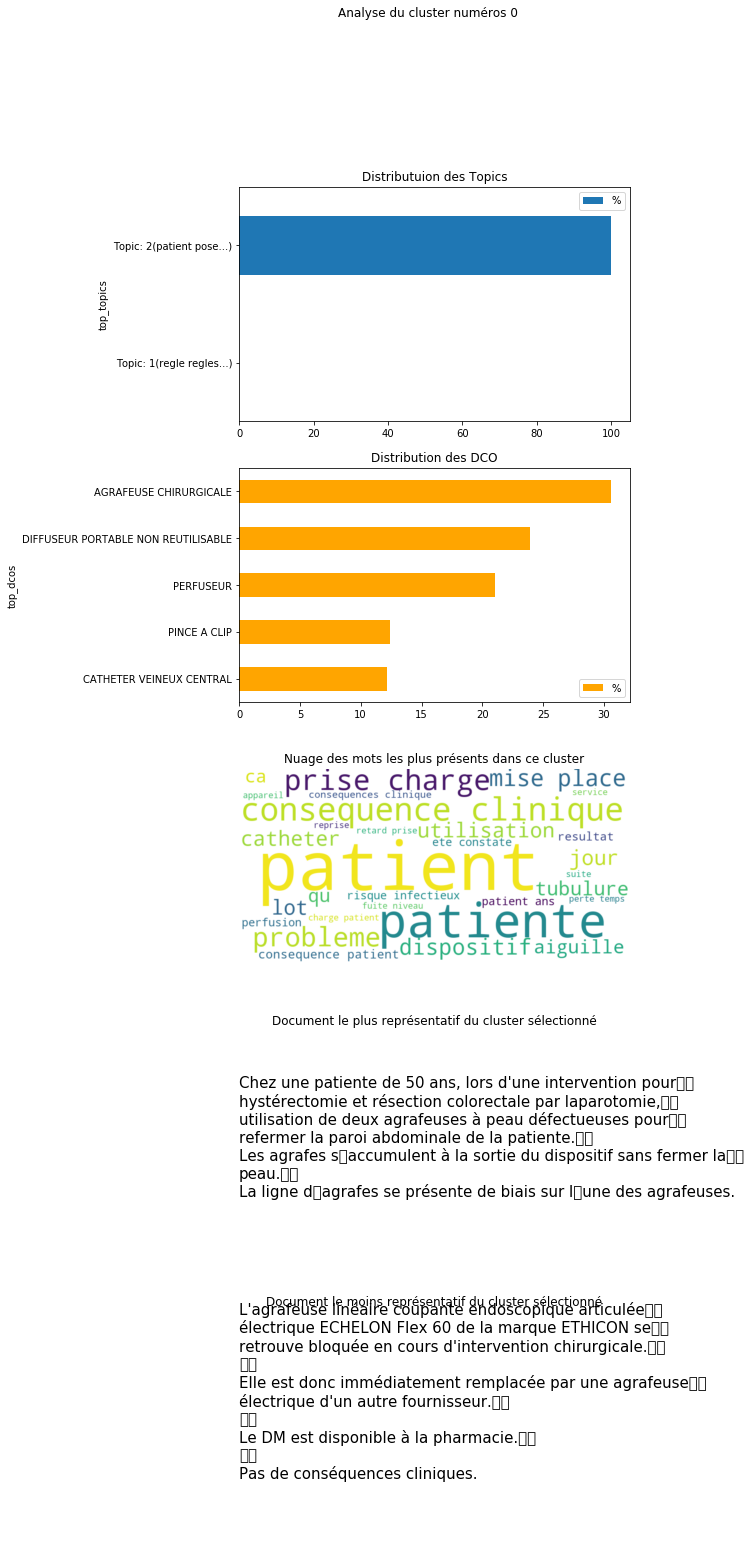

CPU times: user 32.1 s, sys: 14.8 s, total: 46.9 s
Wall time: 47.2 s


In [11]:
%%time 
analysis.plotClusterAnalysis(0, topicmodel,clustermodel)





### 2.4 Analyse des deux clusters les plus éloignés

Les deux clusters les plus éloignés sont le cluster  0  et le cluster 12


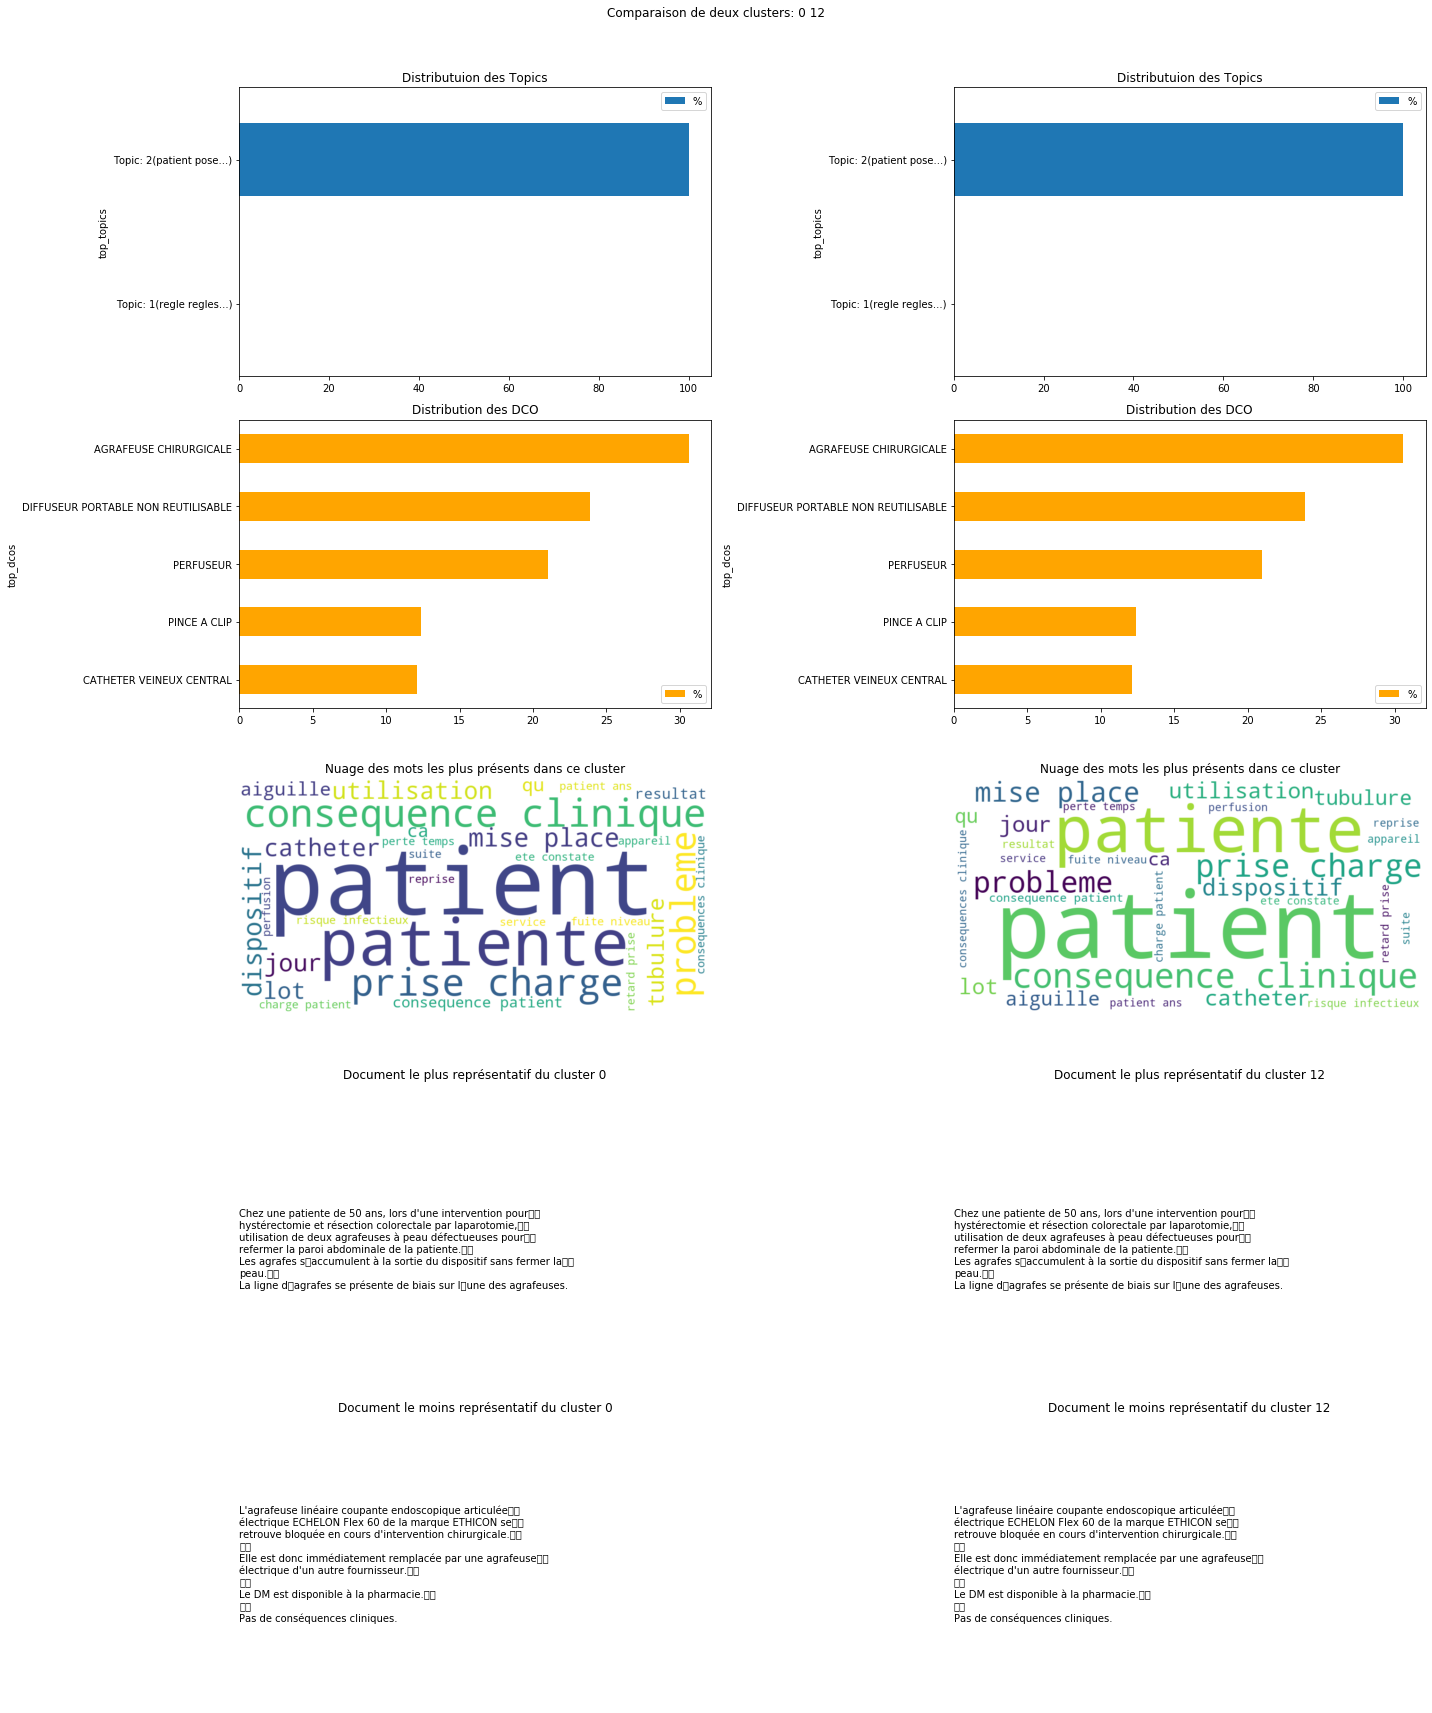

In [5]:
f = clustermodel.get_furthest()
print(' Les deux clusters les plus éloignés sont le cluster ',f[0][0], ' et le cluster' ,f[0][1])

clusteur_list = f[0]
analysis.plotCompareClusterAnalysis(f[0][0],f[0][1],topicmodel,clustermodel)

### 2.5 Analyse des deux clusters les plus proches

Les deux clusteurs les plus proches sont le cluster  0  et le cluster 5
CPU times: user 50.7 s, sys: 585 ms, total: 51.3 s
Wall time: 51.9 s


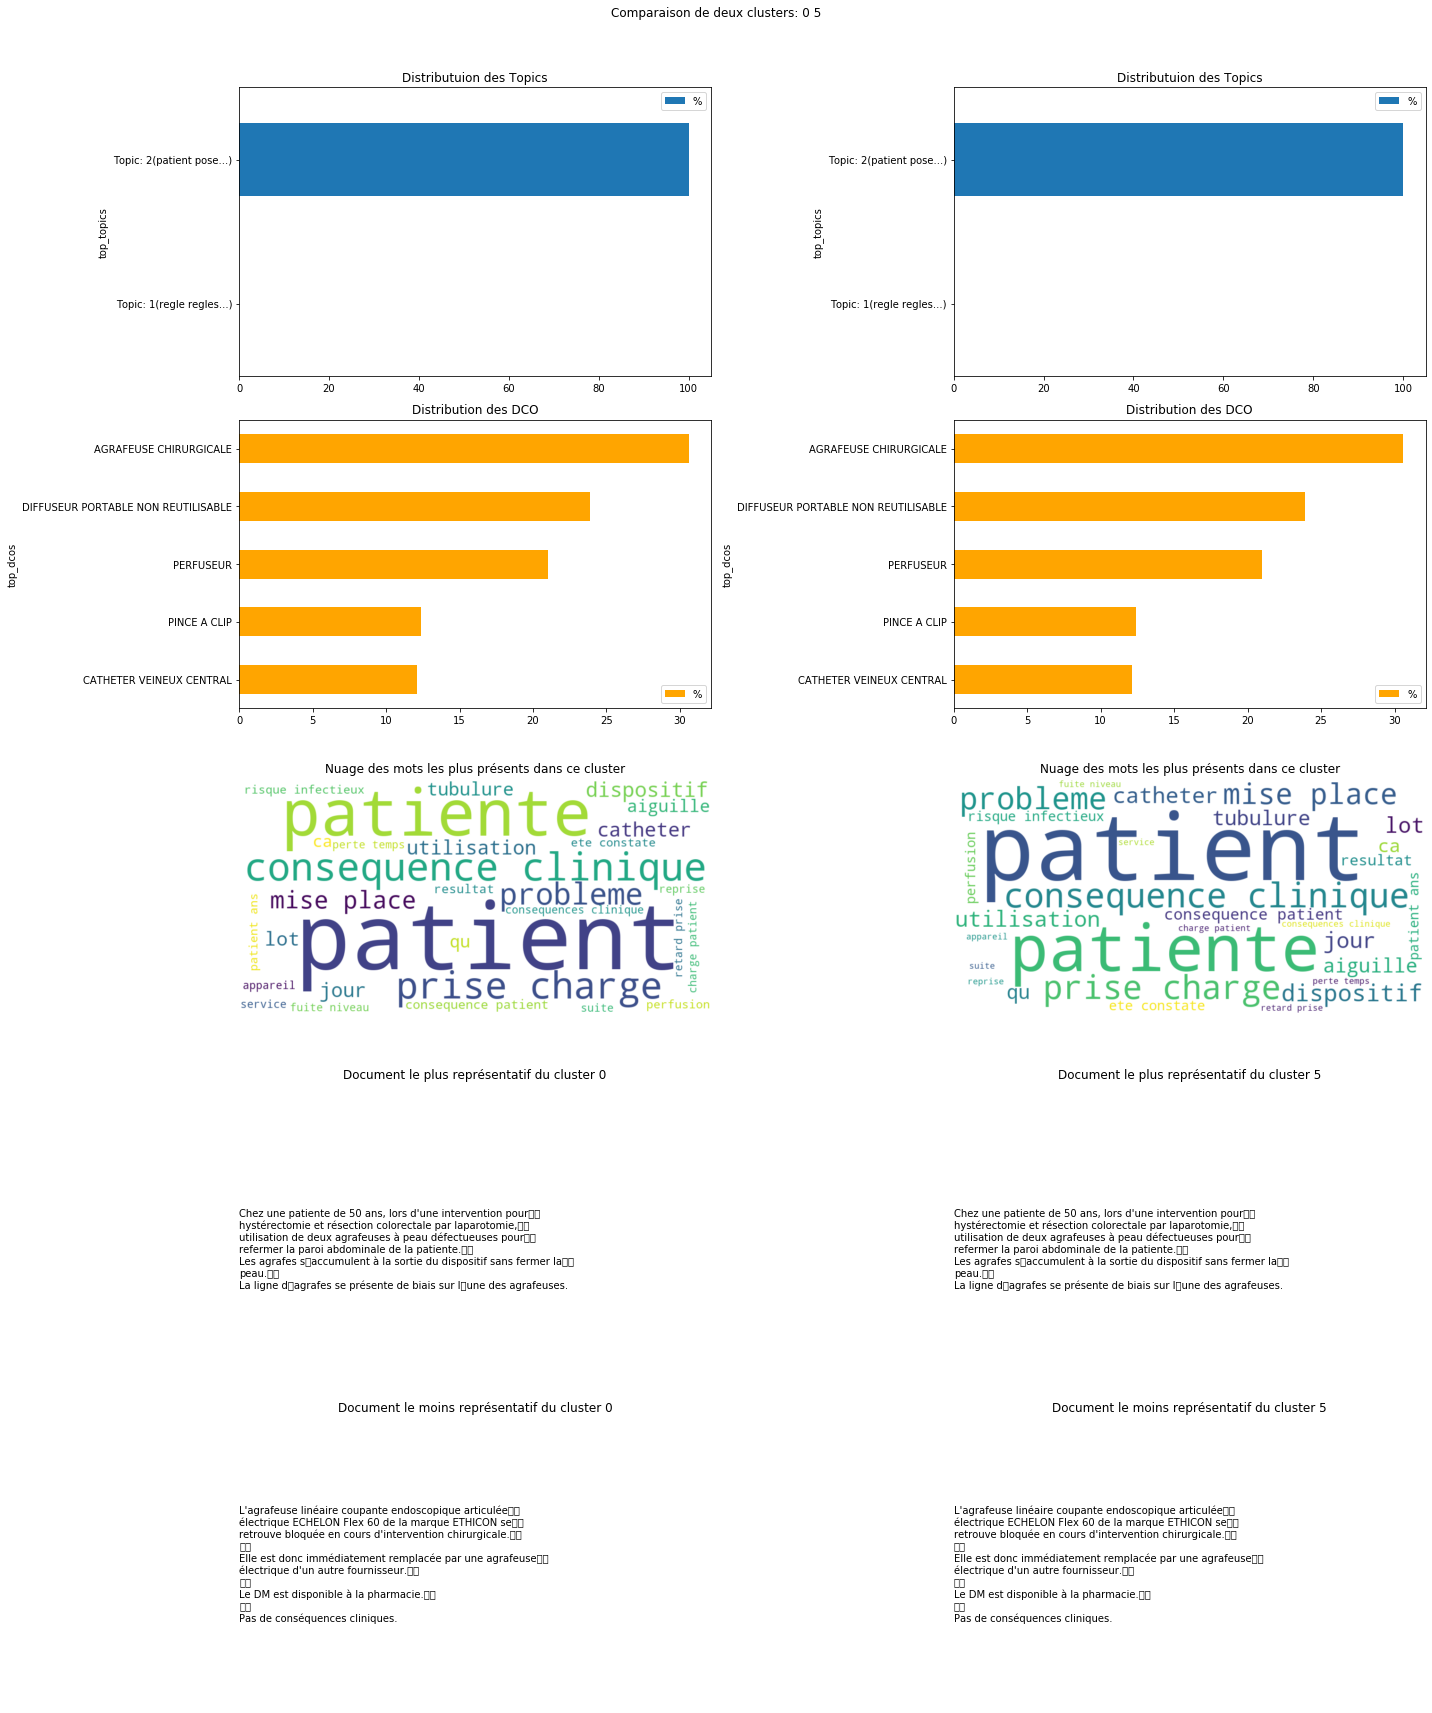

In [8]:
%%time
f = clustermodel.get_closest()
print(' Les deux clusteurs les plus proches sont le cluster ',f[0][0], ' et le cluster' ,f[0][1])

clusteur_list = f[0]
clusteur_list = f[0]
analysis.plotCompareClusterAnalysis(f[0][0],f[0][1],topicmodel,clustermodel)